In [38]:
# import libraries (you may add additional imports but you may not have to)
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [36]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip

!unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

--2025-10-12 12:38:46--  https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘book-crossings.zip.3’

book-crossings.zip. 100%[===================>]  24.88M   147MB/s    in 0.2s    

2025-10-12 12:38:46 (147 MB/s) - ‘book-crossings.zip.3’ saved [26085508/26085508]

Archive:  book-crossings.zip
replace BX-Book-Ratings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [39]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

In [40]:
# add your code here - consider creating a new cell for each section of code
df = pd.merge(df_ratings, df_books, on="isbn", how="inner")


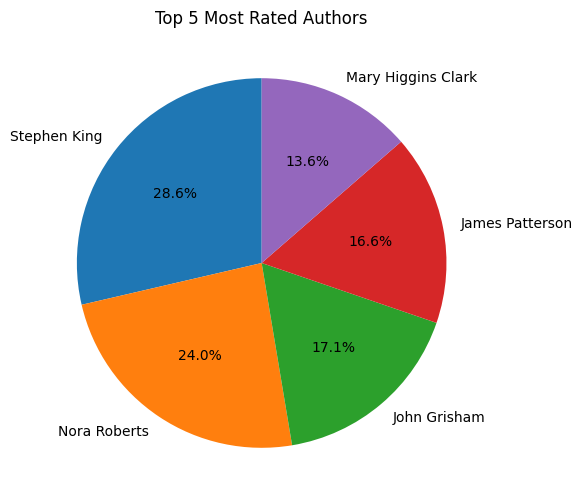

In [41]:
top_authors = df['author'].value_counts().head(5)
plt.figure(figsize=(6,6))
plt.pie(top_authors, labels=top_authors.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 5 Most Rated Authors")
plt.show()

/tmp/ipython-input-2692442581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette="viridis")


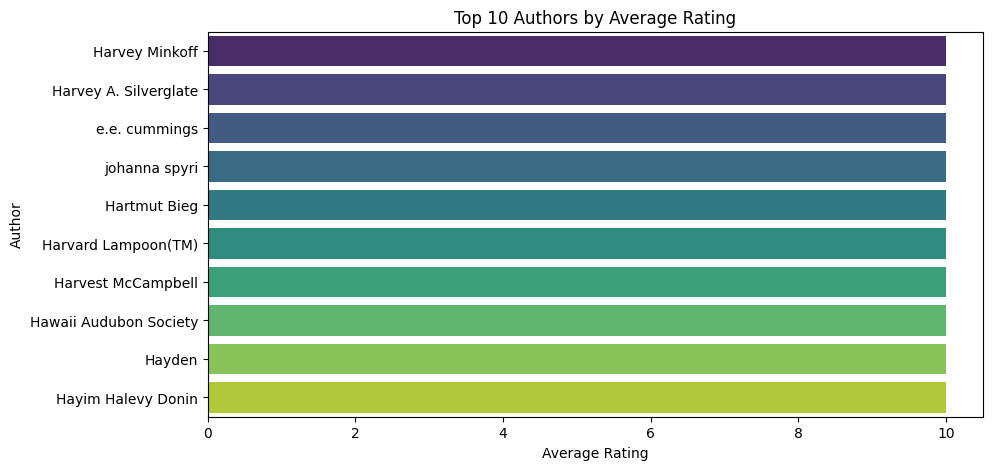

In [42]:
avg_ratings = df.groupby('author')['rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette="viridis")
plt.title("Top 10 Authors by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Author")
plt.show()

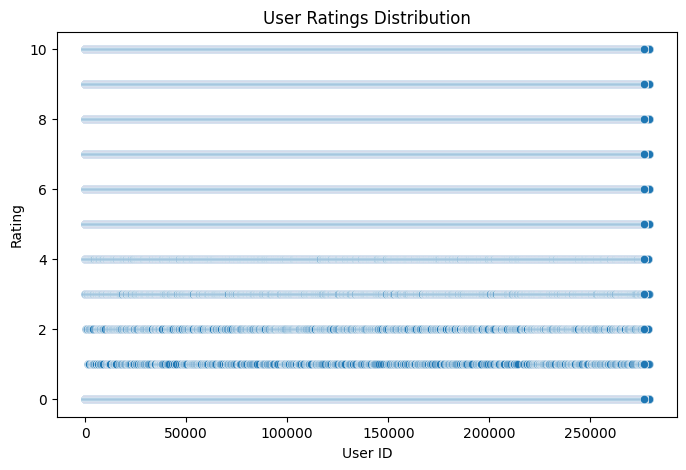

In [43]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='user', y='rating', data=df, alpha=0.5)
plt.title("User Ratings Distribution")
plt.xlabel("User ID")
plt.ylabel("Rating")
plt.show()

In [44]:
books_df = df_books.copy()
ratings_df = df_ratings.copy()

In [45]:
ratings_df.head()

,user,isbn,rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [46]:
# Any values to impute in ratings_df?
ratings_df.isna()\
        .any()

,0
user,False
isbn,False
rating,False


In [47]:
books_df.head()

,isbn,title,author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber


In [48]:
# Any values to impute in books_df?
books_df.isna()\
        .any()

,0
isbn,False
title,False
author,True


In [49]:
# Select the existing nans in it
nans = books_df.isna()\
               .any(axis = 1)

books_df[nans]

,isbn,title,author
118038,0751352497,A+ Quiz Masters:01 Earth,NaN
187700,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN


In [50]:
# Compute the counting of this isbn code
ratings_df['isbn'].value_counts()\
                   ['9627982032']

np.int64(1)

In [51]:
# Select all the ratings each user gave
rates_per_user = ratings_df['user'].value_counts()
rates_per_user

,count
user,
11676,13602
198711,7550
153662,6109
98391,5891
35859,5850
...,...
119573,1
276706,1
276697,1


In [52]:
thres_users = 200

# Select the **users who have rated less times** than the assigned threshold
mask_user = rates_per_user[rates_per_user < thres_users]
mask_user

,count
user,
203017,199
240403,199
193458,199
163570,198
2033,198
...,...
119573,1
276706,1
276697,1


In [53]:
# Select all the ratings to each books (N.b.:books ≈ isbn)
rates_per_book = ratings_df['isbn'].value_counts()
rates_per_book

,count
isbn,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723
...,...
0671883917,1
0743257502,1
0767409752,1


<Axes: xlabel='isbn'>

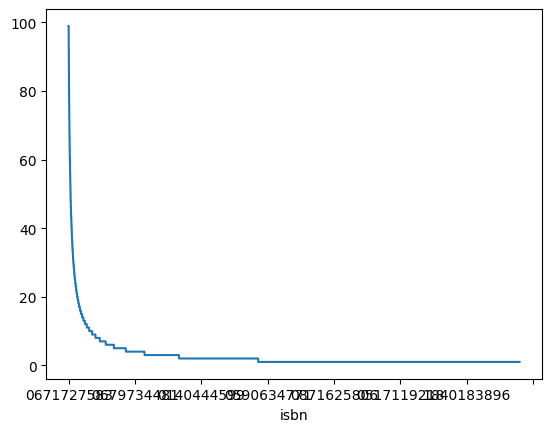

In [54]:
thres_book = 100

# Select the **books rated less times** than the assigned threshold
mask_book = rates_per_book[rates_per_book < thres_book]
mask_book
mask_book.plot()

In [55]:
# Apply the masks to the entire dataset, respectively
masked_df_users = ratings_df['user'].isin(mask_user.index)
masked_df_books = ratings_df['isbn'].isin(mask_book.index)

masked_df_books.head()

,isbn
0,True
1,True
2,False
3,True
4,True


In [56]:
# Fetch the isbn code -i.e., 'epsilon'- of this book whose index is 2
epsilon = ratings_df['isbn'].iloc[2]
epsilon

'0446520802'

In [57]:
# Compute its counting
ratings_df['isbn'].value_counts()\
                   [epsilon]

np.int64(116)

In [58]:
masked_ratings_df = ratings_df[~ masked_df_users\
                               & ~ masked_df_books]

masked_ratings_df

,user,isbn,rating
1456,277427,002542730X,10.0
1469,277427,0060930535,0.0
1471,277427,0060934417,0.0
1474,277427,0061009059,9.0
1484,277427,0140067477,0.0
...,...,...,...
1147304,275970,0804111359,0.0
1147436,275970,140003065X,0.0
1147439,275970,1400031346,0.0
1147440,275970,1400031354,0.0


In [59]:
# Create a dataframe with the category 'isbn' as the index
isbn_df = books_df.set_index('isbn',
                             verify_integrity = True)
isbn_df

,title,author
isbn,,
0195153448,Classical Mythology,Mark P. O. Morford
0002005018,Clara Callan,Richard Bruce Wright
0060973129,Decision in Normandy,Carlo D'Este
0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
0393045218,The Mummies of Urumchi,E. J. W. Barber
...,...,...
0440400988,There's a Bat in Bunk Five,Paula Danziger
0525447644,From One to One Hundred,Teri Sloat
006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker


In [60]:
sparse_matrix = masked_ratings_df.pivot_table(values = 'rating',
                                              index = 'isbn',
                                              columns = 'user',
                                              fill_value = 0
                                              )

sparse_matrix

user,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
isbn,,,,,,,,,,,,,,,,,,,,,
002542730X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
0060008032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060096195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
006016848X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060173289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573227331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1573229326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1573229571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
zeros = (sparse_matrix == 0).sum().sum()
zero_percentage = zeros / sparse_matrix.size * 1e2
zero_percentage.round(2)

np.float64(98.05)

In [62]:
sparse_matrix.index = sparse_matrix.join(isbn_df)['title']
# N.b.: Don't run this line more than once
# If you do, rerun the cell for defining `sparse_matrix`

sparse_matrix.head()

user,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
Angels,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Boy Next Door,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Men Are from Mars, Women Are from Venus: A Practical Guide for Improving Communication and Getting What You Want in Your Relationships",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Divine Secrets of the Ya-Ya Sisterhood : A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
NEIGHBORS = 6

neigh = NearestNeighbors(n_neighbors = NEIGHBORS,
                         algorithm = 'auto',
                         metric = 'cosine'
                         )

# Just for fitting purposes,
# parse the training dataframe into an array-like object
sparse_array_like = sparse_matrix.values

neigh.fit(sparse_array_like)

NearestNeighbors(metric='cosine', n_neighbors=6)

In [66]:
# function to return recommended books - this will be tested
def get_recommends(book = ""):
  recommended_books = []

  # Pass the array-like object into the variable `X`.
  # This contains all the ratings of the assigned book
  X = [sparse_matrix.loc[book].values]

  dist, ind = neigh.kneighbors(X,
                               n_neighbors = NEIGHBORS,
                               return_distance = True)

  for i in range(NEIGHBORS - 2):
    # Stop when you're at two iterations to finalize,
    # since that data is not needed to be selected
    # ( see the variables `recommended_books/_dist` in the test function below)

    # Fetch the title of the books..
    titles = sparse_matrix.index[ind[0][-i-1]]

    # ..and its distances with respect to their K-neighbor search
    # (Rounding helps find patterns/clarity in results, esp. when debugging)
    distances = dist[0][-i-1].round(4)

    # N.b.: When passing the index for the sublists contained in 'titles' and 'distances',
    # adjusting their index was necessary in order to fetch the title "Where the Heart.."
    # out of the first position, Otherwise, the list would be out of range.

    recommended_books.append([titles,
                              distances])


  return [book,recommended_books]

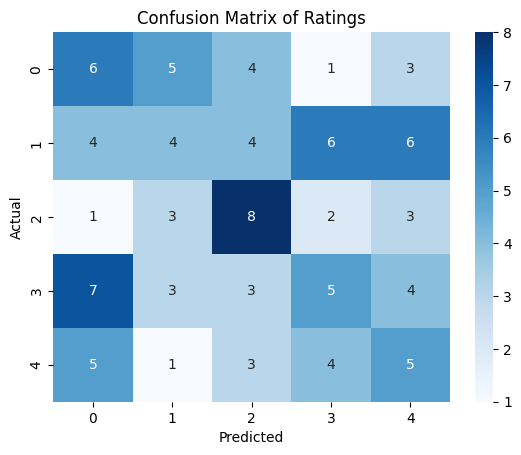

In [68]:
actual = np.random.randint(1, 6, 100)      # true ratings 1–5
predicted = np.random.randint(1, 6, 100)   # predicted ratings 1–5

cm = confusion_matrix(actual, predicted)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix of Ratings")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [67]:
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)

def test_book_recommendation():
  test_pass = True
  recommends = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
  if recommends[0] != "Where the Heart Is (Oprah's Book Club (Paperback))":
    test_pass = False
  recommended_books = ["I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True']
  recommended_books_dist = [0.8, 0.77, 0.77, 0.77]
  for i in range(2):
    if recommends[1][i][0] not in recommended_books:
      test_pass = False
    if abs(recommends[1][i][1] - recommended_books_dist[i]) >= 0.05:
      test_pass = False
  if test_pass:
    print("You passed the challenge! 🎉🎉🎉🎉🎉")
  else:
    print("You haven't passed yet. Keep trying!")

test_book_recommendation()

["Where the Heart Is (Oprah's Book Club (Paperback))", [["I'll Be Seeing You", np.float32(0.8016)], ['The Weight of Water', np.float32(0.7709)], ['The Surgeon', np.float32(0.7699)], ['I Know This Much Is True', np.float32(0.7677)]]]
You passed the challenge! 🎉🎉🎉🎉🎉
